## Домашнее задание 1:  еще не доделано
## введение в спортивный анализ данных, Exploration Data Analysis

Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за :)

In [1]:
!pip install missingno

In [2]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

#### Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


Одна из самых простых вещей, которые мы можем сделать с новым набором данных - посчитать базовые статистики по набору данных. Базовые статистики - достаточно широкий термин: мы можем интерпретировать его как быстрый и примерный способ получить некоторую информацию о данных, как способ получить простую, легкую для понимания информацию о данных, чтобы получить базовое представление о данных. Мы можем использовать метод __describe__ для получения сводной статистики по всем значениям, за иключением пропусков.

In [4]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


После того, как мы получили общее представление о наборе данных, стоит поближе вглянуть на сами данные. С помощью методов __head()__, __tail()__ мы можем легко посмотреть начало и конец pandas.DataFrame, в котором сосредоточены данные.

In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Теперь, давайте перейдем к анализу числовых признаков

In [6]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [7]:
numerical_features.head(n=2)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


Анализ числовых переменных

 Дискретные признаки

In [12]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<40 
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 1


In [10]:
train[discrete_feature].head()

,target
0,0
1,0
2,0
3,0
4,0


Условно дискретных признаков нет

Непрерывные признаки

In [13]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature + ["Id"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 200


## Анализ пропусков

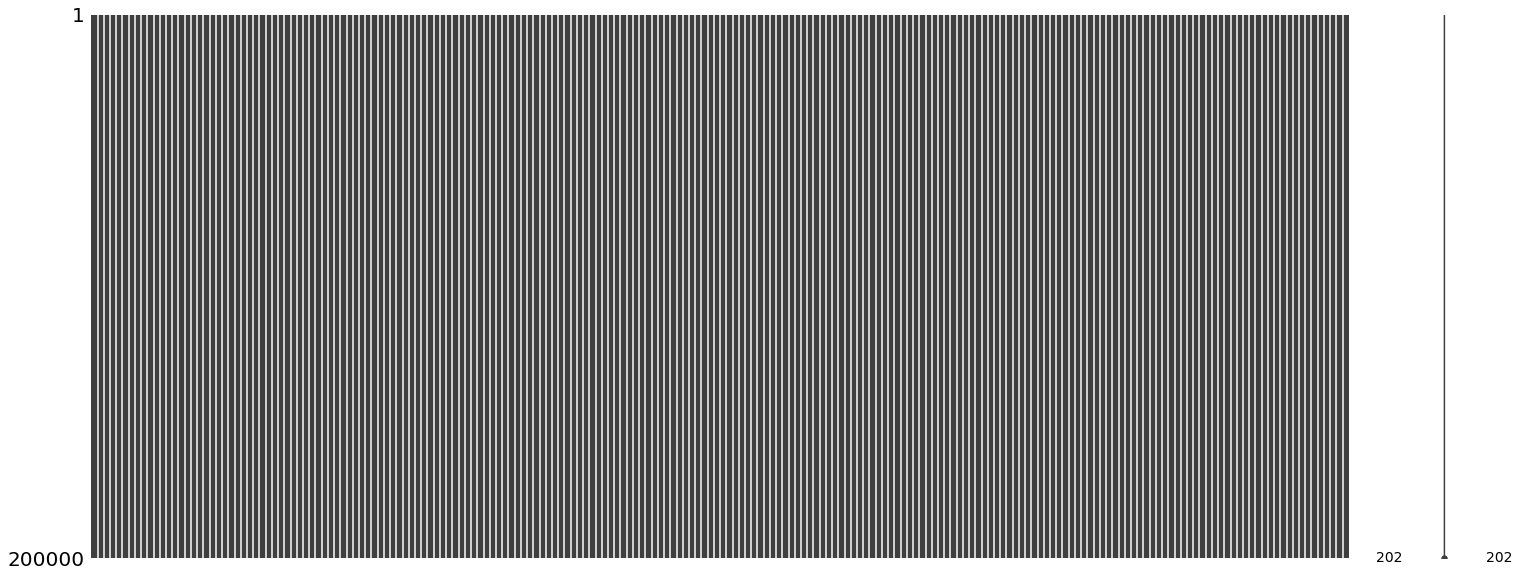

In [16]:
msno.matrix(train)

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
train.isnull().sum(axis = 0)

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0

In [25]:
train.astype(bool).sum(axis=0)

ID_code    200000
target      20098
var_0      200000
var_1      199999
var_2      200000
var_3      200000
var_4      200000
var_5      199997
var_6      200000
var_7      200000
var_8      199999
var_9      200000
var_10     199999
var_11     199998
var_12     200000
var_13     200000
var_14     200000
var_15     200000
var_16     200000
var_17     199998
var_18     200000
var_19     200000
var_20     200000
var_21     200000
var_22     199998
var_23     200000
var_24     200000
var_25     200000
var_26     199999
var_27     199995
var_28     200000
var_29     200000
var_30     199998
var_31     200000
var_32     199998
var_33     200000
var_34     200000
var_35     199998
var_36     199999
var_37     200000
var_38     200000
var_39     199998
var_40     200000
var_41     200000
var_42     200000
var_43     200000
var_44     200000
var_45     200000
var_46     200000
var_47     200000
var_48     200000
var_49     200000
var_50     200000
var_51     200000
var_52     199998
var_53    

Нет переменных с пропущенными значениями, а ноль очень редко имеется в значениях, как если это просто непрерывная величина проходит через 0

#### Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

In [27]:
target = train["target"]
target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [ ]:
Целевая переменная сильно не сбалансирована, значение 1 лишь в 10% случаев.

Для дальнейшего изучения взаимосвязи признаков будем использовать:
* Correlation Heat Map
* Heat Map для отдельных признаков
* Pair Plot
* Scatter Plot

#### Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки 

(если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

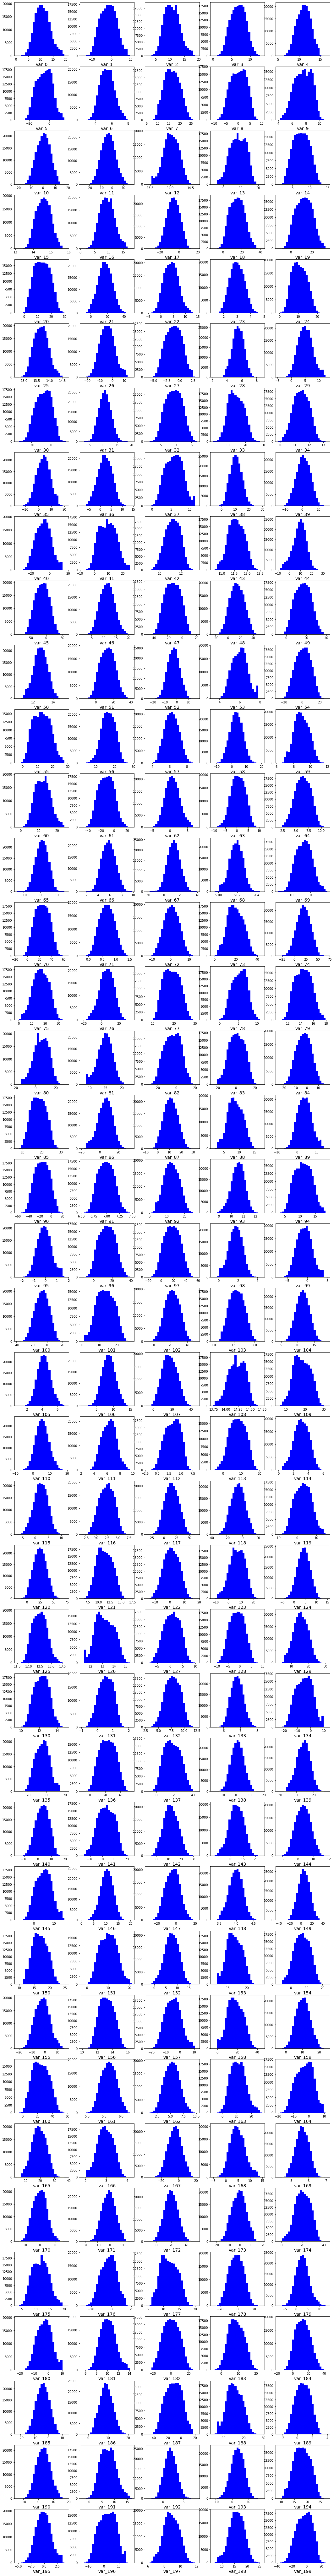

In [53]:
fig, axes = plt.subplots(40, 5, figsize=(18, 150))

for num, feature in enumerate(continuous_feature):
    data = train[feature].copy()
    axes[num//5, num%5].hist(data, bins=25, color="blue")
    axes[num//5, num%5].set_xlabel(feature, fontsize=14)

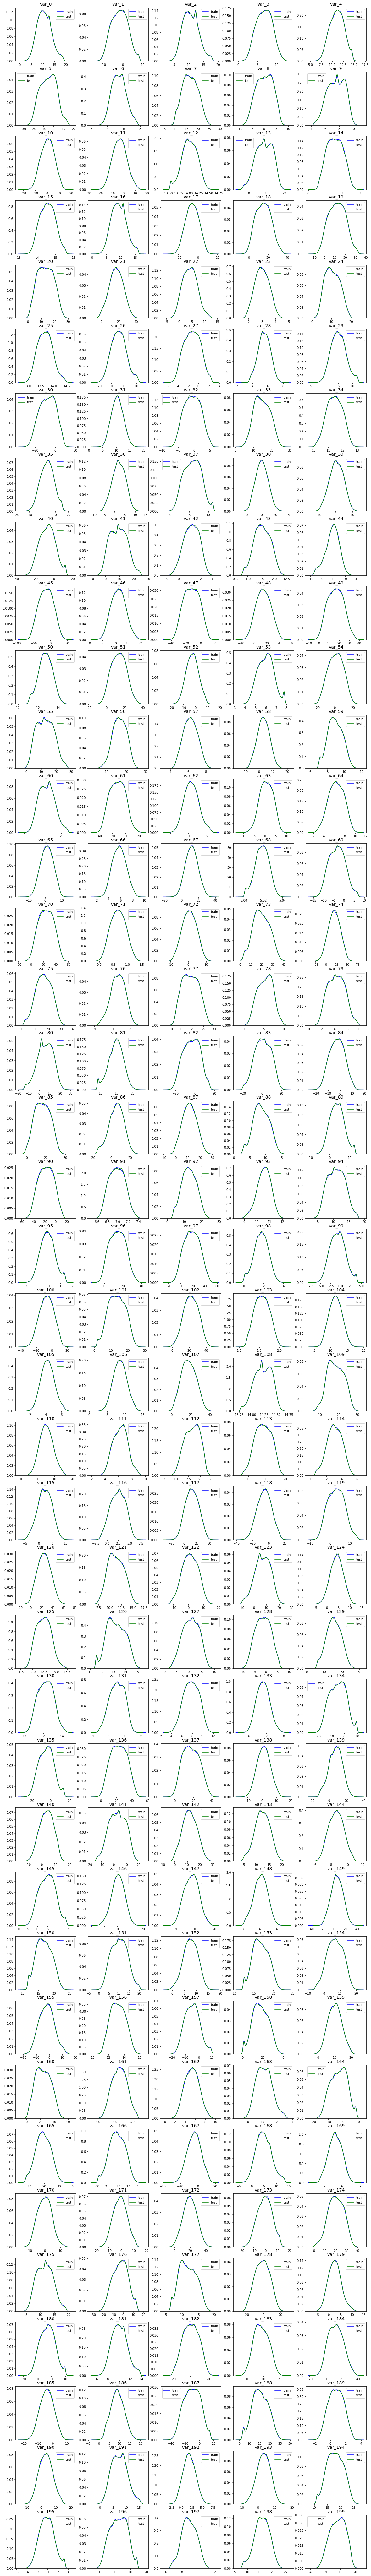

In [54]:
fig, axes = plt.subplots(40, 5, figsize=(20, 150))

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//5, num%5], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//5, num%5], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//5, num%5], color="blue", label="train")
    axes[num//5, num%5].set_title(feature, fontsize=14)

У большинства переменных распределение нормальное или близкое к нему, есть отдельные переменные где максимум сдвинут вправо или влево.
Разбиение на train и test удачное, нет заметно отличающихся графиков.

#### Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

In [65]:
train.describe().loc[['std','max']]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.62315,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.99203,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.67140,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.28180,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(40, 20))

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//4, num%4], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//4, num%4], color="blue", label="train")
    axes[num//4, num%4].set_title(feature, fontsize=14)

#### Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [59]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_1      0.050343
var_179    0.050002
var_40     0.049530
var_184    0.048315
var_78     0.048245
var_170    0.047973
var_191    0.047114
var_94     0.046296
var_67     0.044673
var_18     0.043479
var_173    0.042022
var_164    0.040997
var_118    0.040358
var_147    0.040280
var_91     0.040127
var_89     0.039369
var_95     0.038531
var_155    0.037240
var_35     0.036567
var_71     0.033607
var_106    0.032947
var_162    0.032647
var_157    0.032642
var_48     0.032334
var_163    0.031811
var_180    0.031190
var_5      0.030979
var_119    0.030975
var_145    0.030917
var_167    0.030797
var_49     0.030612
var_32     0.030513
var_130    0.029917
var_90     0.029395
var_24     0.028477
var_195    0.028285
var_125    0.028223
var_135    0.027944
var_52     0.027754


Text(0, 0.5, 'Density')

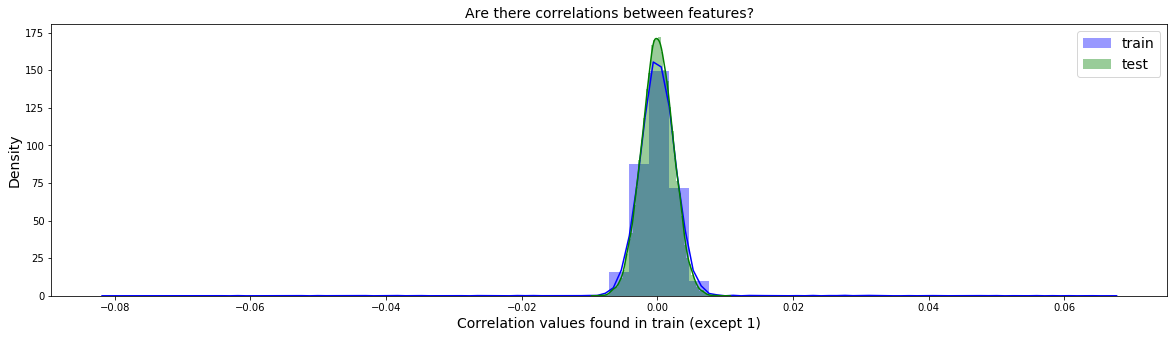

In [60]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

Как видим, что очень странно, корреляции нет с целевой переменной не видно ни у одного признака. Тепловую какрту смысла строить нет. Возможно связано с несбалансированностью целевой переменной.

#### Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

Коэффициент корреляции позволяет установить линейную силу связи между признаками, но также признаки могут быть связаны нелинейно, что сложно определяется коэффициентом корреляции: может быть ситуация, что признаки очень сильно связаны между собой, но коэффициент корреляции равен 0. 

Для начала давайте воспользуемся случайным лесом, чтобы выбрать 10 наиболее значимых признаков. Они могут служить отправной точкой для понимания природы данных и общего понимания данные. Кроме того, они могут дать некоторые идеи о том, как создавать новые признаки. Давайте начнем!

In [34]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("target", axis=1), target)

Wall time: 5min 48s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=2, oob_score=False,
                      random_state=27, verbose=0, warm_start=False)

Text(0.5, 1.0, 'What are the top important features to start with?')

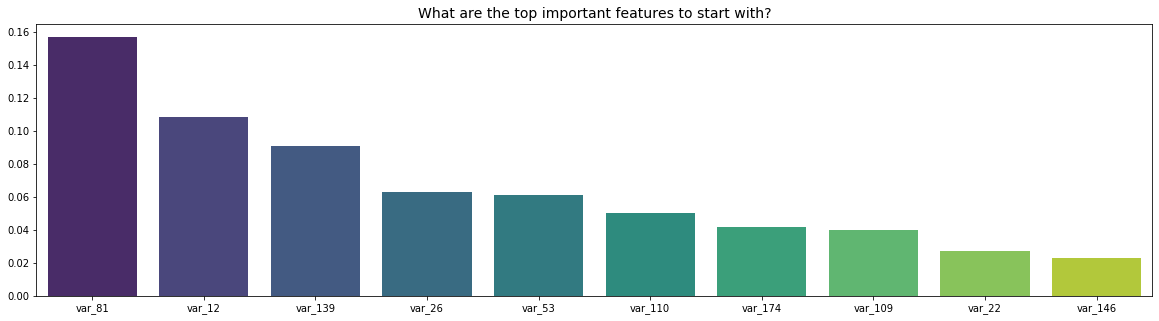

In [35]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)


## Pair Plot

PairPlor между `SalePrice` и высоко-коррелированными переменными. Строим этот график для лучшего понимания характерика связи между целевой переменной и признаком. С помощью корреляционной матрицы мы установили что связь между определенными признаками и целевой переменной есть, но характер этой связи пока остается невыясненным. Строим PairPlot для лучшего понимания характера этой связи;

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


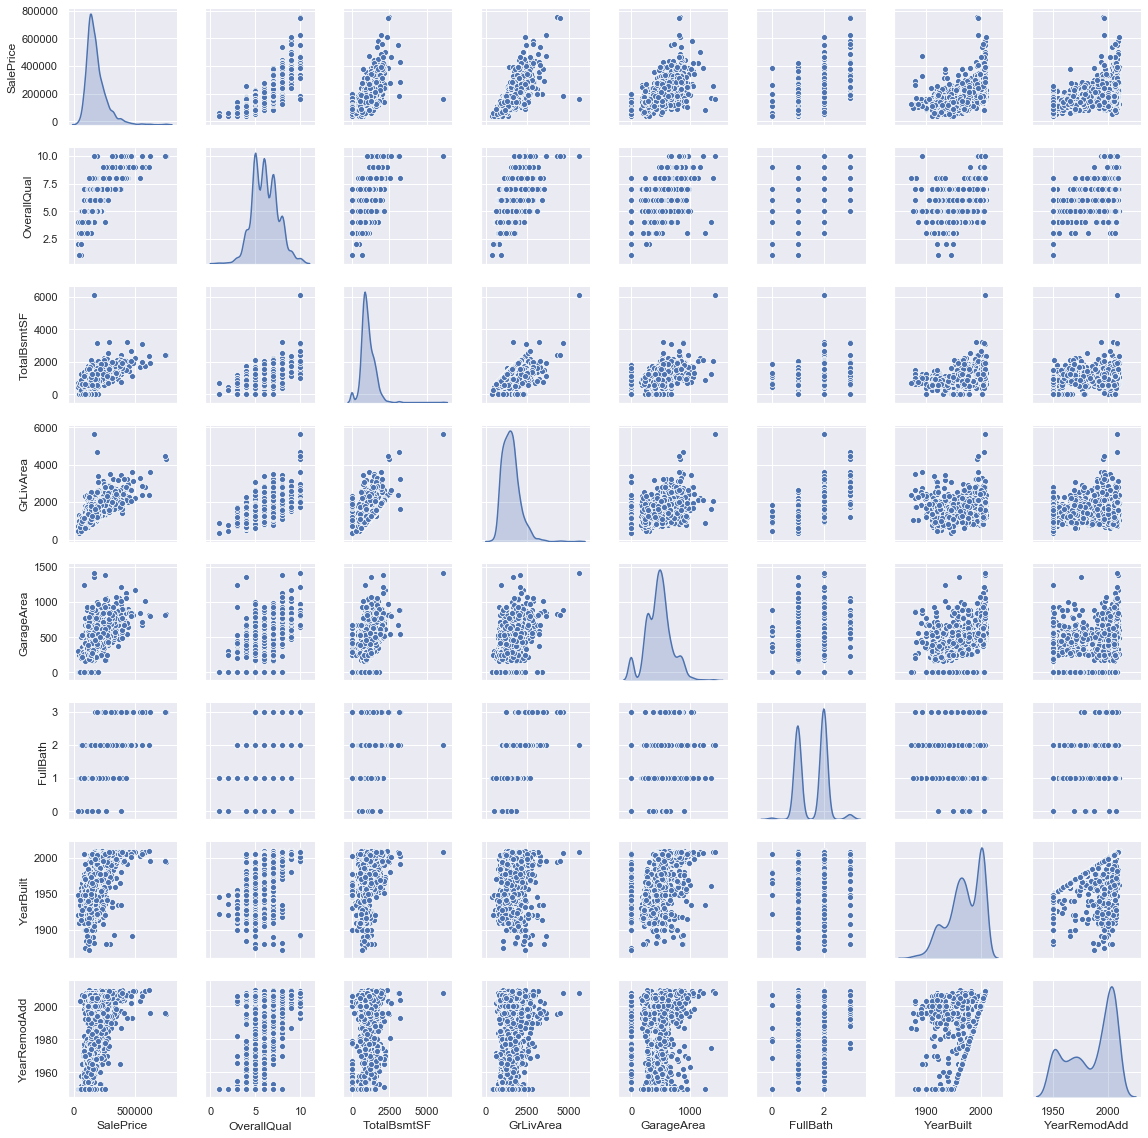

In [221]:
sns.set()
columns = [
    "SalePrice",
    "OverallQual",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "FullBath",
    "YearBuilt",
    "YearRemodAdd"
]

sns.pairplot(train[columns], size=2, kind="scatter", diag_kind="kde")
plt.show()

Хотя мы уже знаем о том какие переменные связи с `SalePrice` наиболее сильным образом, PairPlot дает нам дополнительное представление о скореллированных признаках; 

__Короткий анализ:__

* интересное наблюдение находится между `TotalBsmtSF` и `GrLiveArea`. На этом графике мы можем видеть, как точки образуют линейную линию, которая действует почти как граница. Совершенно очевидно, что большинство точек остаются ниже этой линии. Площадь подвала может быть равна жилой площади над землей, но не предполагается, что площадь подвала больше жилой площади над землей.

* Еще одно интересное наблюдение находится между `SalePrice` и `YearBuilt`. Внизу «облака точек» мы видим то, что кажется почти экспоненциальной функцией. Мы также можем увидеть ту же тенденцию в верхней границе «облака точек».

* Последнее наблюдение: цены сейчас растут быстрее, чем в предыдущие годы.

## Scatter Plot

Scatter-plot'ы между наиболее скореллированными признаками

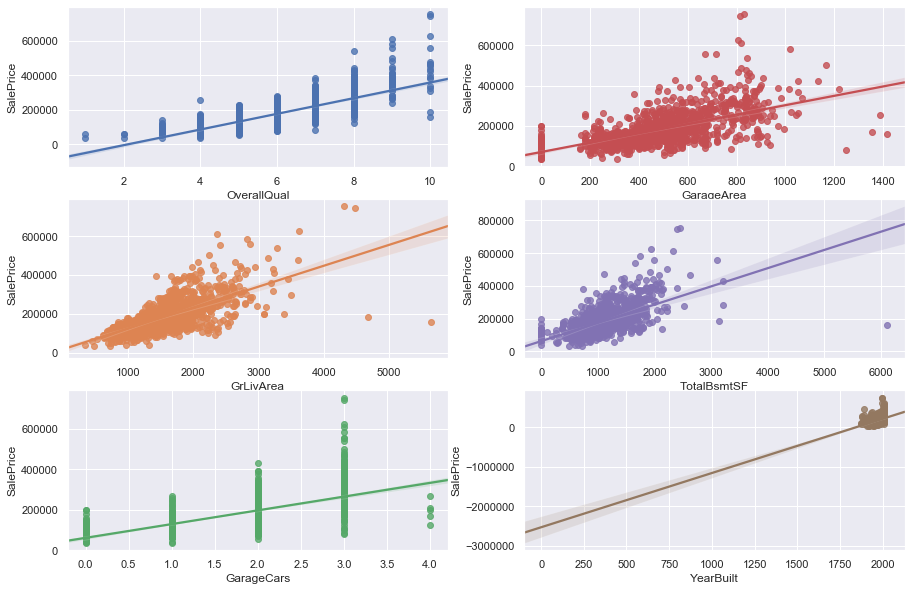

In [222]:
features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "YearBuilt"
]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for num, feature in enumerate(features):
    sns.regplot(
        x=feature,
        y="SalePrice",
        data=train,
        ax=axes[num%3, num//3],
        scatter=True,
        fit_reg=True
    )

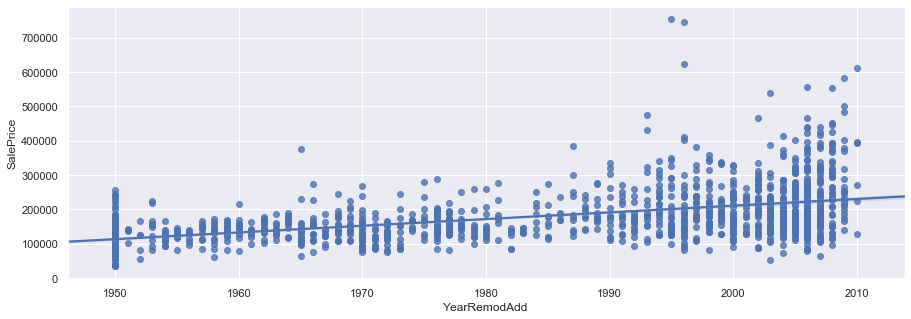

In [223]:
data = train[["YearRemodAdd", "SalePrice"]]
data = data.sort_values(by="YearRemodAdd").reset_index(drop=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(
    x="YearRemodAdd",
    y="SalePrice",
    data=data,
    ax=axes
)

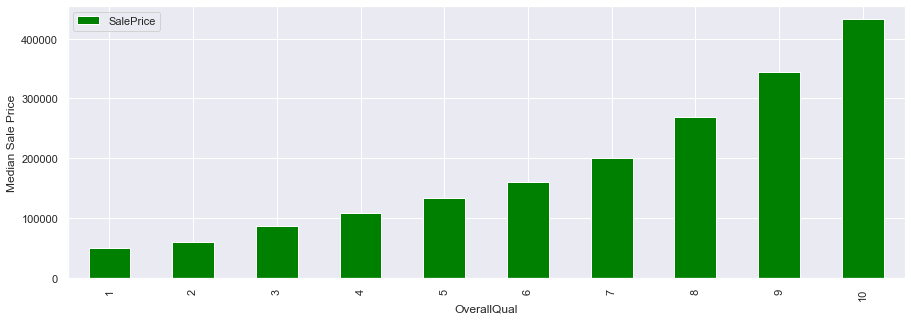

In [224]:
saleprice_overall_quality = train.pivot_table(
    index="OverallQual",
    values="SalePrice",
    aggfunc = np.median
)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
saleprice_overall_quality.plot(kind="bar", color="Green", ax=axes)
plt.ylabel("Median Sale Price")
plt.xlabel("OverallQual")
plt.show()

## BoxPlot

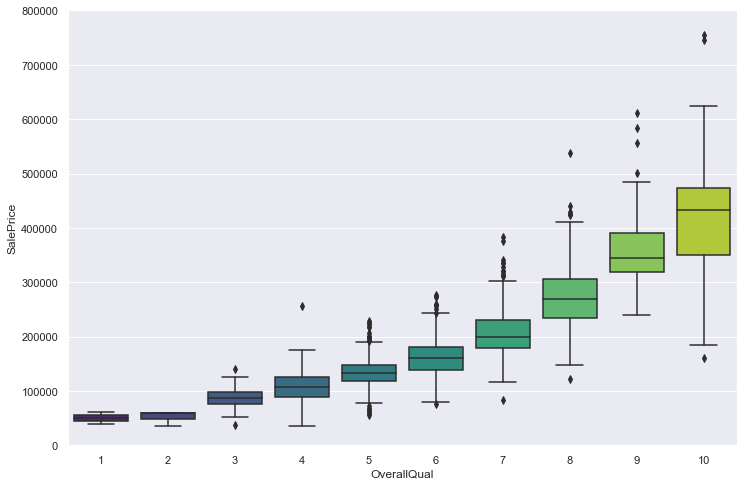

In [225]:
feature_name = "OverallQual"
data = pd.concat([train["SalePrice"], train[feature_name]], axis=1)

fig, axes = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=feature_name, y="SalePrice", data=data, palette="viridis")
fig.axis(ymin=0, ymax=800000);

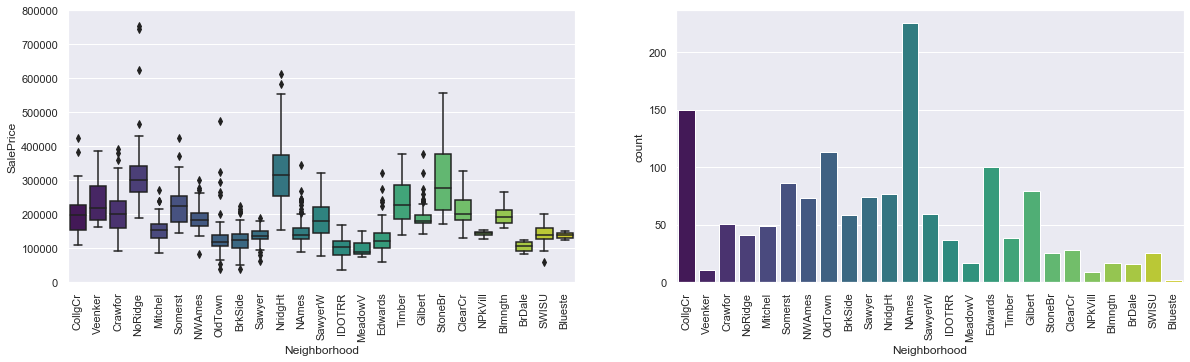

In [226]:
feature_name = "Neighborhood"
data = pd.concat([train["SalePrice"], train[feature_name]], axis=1)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=feature_name, y="SalePrice", data=data, palette="viridis", ax=axes[0])
axes[0].tick_params(axis="x", rotation=90)
axes[0].axis(ymin=0, ymax=800000)

sns.countplot(x="Neighborhood", data=data, palette="viridis", ax=axes[1])
axes[1].tick_params(axis="x", rotation=90)

__Вывод:__ некоторые районы не отличаются ценой, следовательно, их можно объединить в одну корзину (один кластер), на основе которого моэно в дальнейшем создавать новые признаки. 

## Анализ распределения на обучении и тесте
#### Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.
Совпадение распределений на выборке для обучения и для тестирования - одна из ключевых коцепций статистического обучения. Обучая модель на некоторых данных, мы принимаем гипотезу о том, что модель должна работать на таких же данных.

## Kolmogorov-Smirnov Test

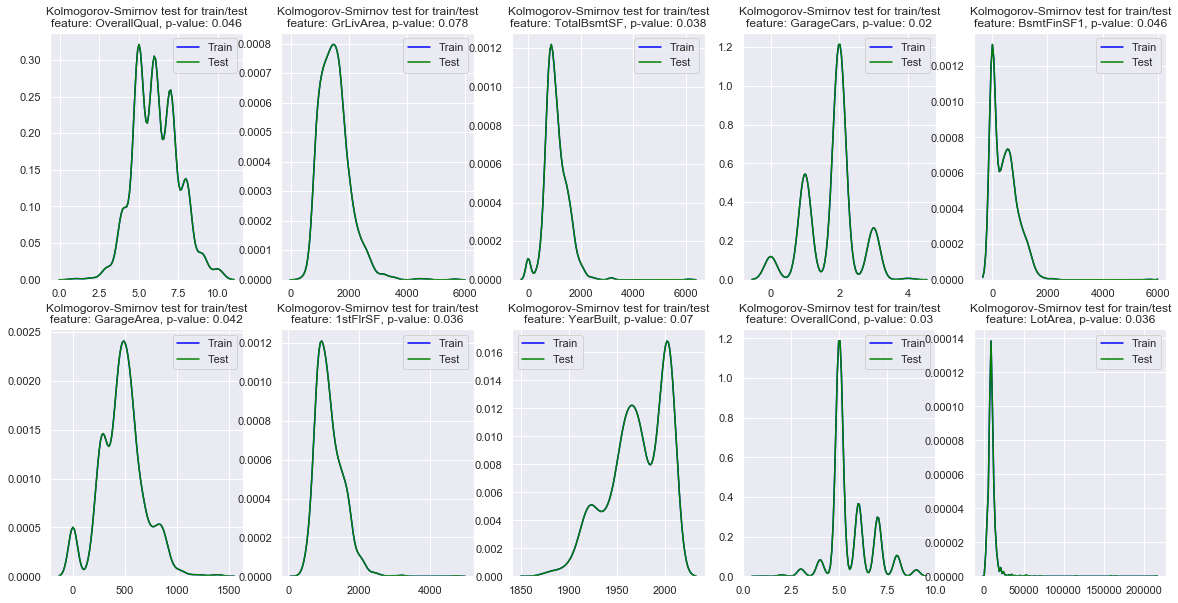

In [229]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

## Population Stability Index

In [230]:
class PSI(BaseEstimator, TransformerMixin):
    """
    Вычисление PSI и отбор признаков на их основе.

    Parameters
    ----------
    threshold: float
        Порог для отбора переменных по PSI.
        Если PSI для переменной выше порога - переменная макрируется
        0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

    categorical_features: List[str], optional, default = None
        Список категориальных признаков для анализа.
        Опциональный параметр, по умолчанию, не используется, т.е.
        категориальные признаки отсутствуют.

    n_bins: int, optional, default = 20
        Количество бинов, на которые разбивается выборка.

    min_value: float, optional, default = 0.005
        Значение которое используется, если рассчитанный psi = 0.

    bin_type: string, optional, default = "quanitles"
        Способ разбиения на бины: "quantiles" or "bins".
        При выборе "quantiles" - выборка будет разбита на n_bins
        квантилей, при выборке "bins" - выборка будет разбита на
        n_bins бакетов с равным шагом между бакетами.
        Иные значения приводят к возникновению ValueError.

    Attributes
    ----------
    scores_: Dict[str, float]
        Словарь со значениями PSI,
        ключ словаря - название признака, значение - PSI-score.

    """
    def __init__(self,
                 threshold: float,
                 categorical_features: Optional[List[str]] = None,
                 bin_type: str = "quantiles",
                 min_value: float = 0.005,
                 n_bins: int = 20):

        self.threshold = threshold
        self.categorical_features = categorical_features
        self.min_value = min_value
        self.n_bins = n_bins
        if bin_type in ["quantiles", "bins"]:
            self.bin_type = bin_type
        else:
            raise ValueError(
                "Incorrect bin_type value. Expected 'quantiles' or 'bins', "
                f"but {bin_type} is transferred."
            )
        self.scores = {}

    def calculate_bins(self, data: pd.Series) -> np.array:
        """
        Вычисление границ бинов для разбиения выборки.

        Parameters
        ----------
        data: pandas.Series, shape = [n_samples, ]
            наблюдения из train-выборки.

        Returns
        -------
        bins: numpy.array, shape = [self.n_bins + 1]
            Список с границами бинов.

        """
        if self.bin_type == "quantiles":
            bins = np.linspace(0, 100, self.n_bins + 1)
            bins = [np.nanpercentile(data, x) for x in bins]

        else:
            bins = np.linspace(data.min(), data.max(), self.n_bins + 1)

        return np.unique(bins)

    def calculate_psi_in_bin(self, expected_score, actual_score) -> float:
        """
        Вычисление значения psi для одного бакета.

        Осуществляется проверка на равенство нулю expected_score и
        actual_score: если один из аргументов равен нулю, то его
        значение заменяется на self.min_value.

        Parameters
        ----------
        expected_score: float
            Ожидаемое значение.

        actual_score: float
            Наблюдаемое значение.

        Returns
        -------
        value: float
            Значение psi в бине.

        """
        if expected_score == 0:
            expected_score = self.min_value
        if actual_score == 0:
            actual_score = self.min_value

        value = (expected_score - actual_score)
        value = value * np.log(expected_score / actual_score)

        return value

    def calculate_psi(self, expected: pd.Series, actual: pd.Series, bins) -> float:
        """
        Расчет PSI для одной переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        bins: pandas.Series, shape = [self.n_bins, ]
            Бины для расчета PSI.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        expected_score = np.histogram(expected.fillna(-9999), bins)[0]
        expected_score = expected_score / expected.shape[0]

        actual_score = np.histogram(actual.fillna(-9999), bins)[0]
        actual_score = actual_score / actual.shape[0]

        psi_score = np.sum(
            self.calculate_psi_in_bin(exp_score, act_score)
            for exp_score, act_score in zip(expected_score, actual_score)
        )

        return psi_score

    def calculate_numeric_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для числовой переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = self.calculate_bins(expected)
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def calculate_categorical_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для категориальной переменной.
        PSI рассчитывается для каждого уникального значения категории.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = np.unique(expected).tolist()
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def fit(self, X, y=None):
        """
        Вычисление PSI-значения для всех признаков.

        Parameters
        ----------
        X: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        y: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        self
        """
        missed_columns = list(set(X.columns) - set(y.columns))

        if missed_columns:
            raise MissedColumnError(
                f"Missed {list(missed_columns)} columns in data.")

        if self.categorical_features:
            numeric_features = list(
                set(X.columns) - set(self.categorical_features)
            )
            for feature in self.categorical_features:
                self.scores[feature] = self.calculate_categorical_psi(
                    X[feature], y[feature]
                )
        else:
            numeric_features = X.columns

        for feature in tqdm(numeric_features):
            self.scores[feature] = self.calculate_numeric_psi(
                X[feature], y[feature]
            )
        return self

    def transform(self, X, y=None) -> pd.DataFrame:
        """
        Отбор переменных по self.threshold.
        Если PSI-score для переменной выше порога, то переменная
        помечается 0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

        Parameters
        ----------
        data: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        target: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        scores: pandas.DataFrame, shape = [n_features, 3]
            Датафрейм с PSI-анализом переменных.

        """
        check_is_fitted(self, "scores")
        scores = pd.Series(self.scores)
        scores = pd.DataFrame({"Variable": scores.index, "PSI": scores.values})
        scores["Selected"] = np.where(scores.PSI < self.threshold, 1, 0)
        scores = scores.sort_values(by="PSI")

        mask = scores["Selected"] == 1
        self.used_features = scores.loc[mask, "Variable"].tolist()

        return scores.reset_index(drop=True)

In [233]:
features_to_score = numerical_features.drop(["Id", "SalePrice"], axis=1).columns.tolist()
psi = PSI(threshold=0.01)

In [234]:
psi.fit_transform(
    X=train[features_to_score],
    y=test[features_to_score]
)

100%|██████████| 36/36 [00:00<00:00, 201.40it/s]


,Variable,PSI,Selected
0,3SsnPorch,0.000000e+00,1
1,MiscVal,4.699355e-07,1
2,PoolArea,4.699355e-07,1
3,LowQualFinSF,1.880387e-06,1
4,ScreenPorch,4.610593e-05,1
5,BsmtFullBath,5.512488e-05,1
6,HalfBath,1.496541e-04,1
7,KitchenAbvGr,4.763500e-04,1
8,BsmtHalfBath,1.044350e-03,1
9,BsmtFinSF2,1.153825e-03,1


## Adversarial Validation

In [235]:
X_adv = pd.concat([
    train[features_to_score], test[features_to_score]
])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [236]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)

print(f"CV-score: {round(np.mean(cv), 4)}")

CV-score: 0.5065
CPU times: user 866 ms, sys: 5.49 ms, total: 872 ms
Wall time: 874 ms


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

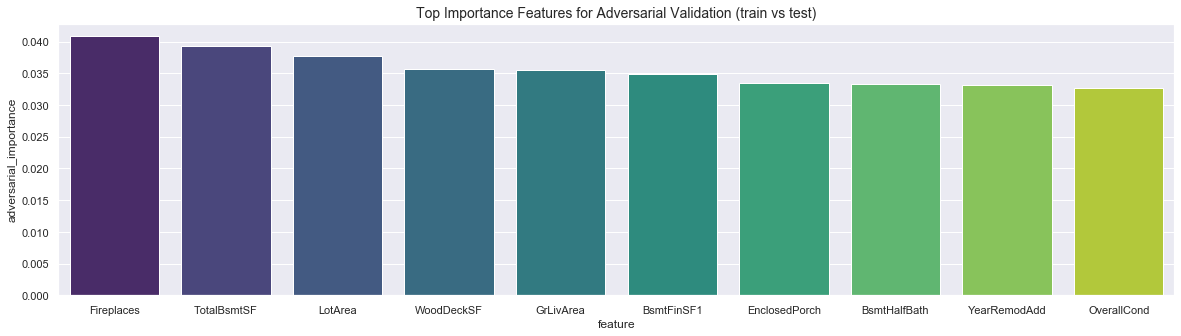

In [237]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)